In [ ]:
!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install pylatexenc
!pip install qiskit-aer
!pip install qiskit-algorithms
!pip install qiskit-nature
!pip install qiskit-machine-learning

In [ ]:
from qiskit import transpile
from qiskit.primitives import BackendSampler
from qiskit.qasm2 import dumps
from qiskit.qasm2 import dump
from qiskit.circuit import QuantumCircuit
from qiskit.circuit.library import DiagonalGate
from qiskit.converters import circuit_to_dag
import qiskit.qasm2
from qiskit.circuit.library import DiagonalGate
from qiskit.primitives import (
    Sampler,
    StatevectorSampler,
    Estimator,
    StatevectorEstimator,
)
from qiskit.providers.basic_provider import BasicProvider
from qiskit.quantum_info import Statevector
from qiskit.quantum_info import Operator
from qiskit.providers.basic_provider import BasicSimulator
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit import pulse, qpy
from qiskit import pulse
from qiskit.circuit import Parameter
from math import pi
from qiskit.compiler import schedule, transpile
#from qiskit.converters import ast_to_dag, dag_to_circuit
from qiskit.utils import parallel_map
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_state_city
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import DensityMatrix
from qiskit.visualization import visualize_transition
from qiskit.visualization import array_to_latex
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import DensityMatrix
from qiskit.transpiler import PassManager
from qiskit.visualization import pass_manager_drawer
#from qiskit.transpiler.passes import Unroller
from qiskit.dagcircuit import DAGCircuit
from qiskit.converters import circuit_to_dag
from qiskit.visualization import dag_drawer
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization import plot_circuit_layout
from qiskit.visualization import plot_coupling_map
from qiskit.visualization import plot_distribution
from qiskit.visualization import plot_error_map
from qiskit.visualization import plot_gate_map
from qiskit.visualization import plot_state_hinton
import numpy as np
from qiskit.visualization import plot_state_paulivec
from qiskit.visualization import plot_state_qsphere
from qiskit_aer.aerprovider import AerSimulator

In [ ]:
from qiskit.providers.basic_provider import basic_simulator
BasicProvider().get_backend('basic_simulator')

In [ ]:
qiskit.__version__ # To check the version

'1.2.4'

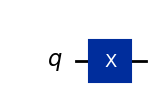

In [ ]:
qc =QuantumCircuit(1)
qc.x(0)
qc.draw('mpl')

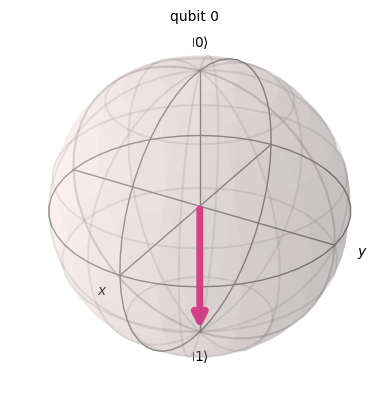

In [ ]:
qc = QuantumCircuit(1)
qc.x(0)
qc.save_statevector()


simulator = AerSimulator(method = 'statevector')
qc = transpile(qc, simulator)
result = simulator.run(qc).result().get_statevector(qc)
plot_bloch_multivector(result)

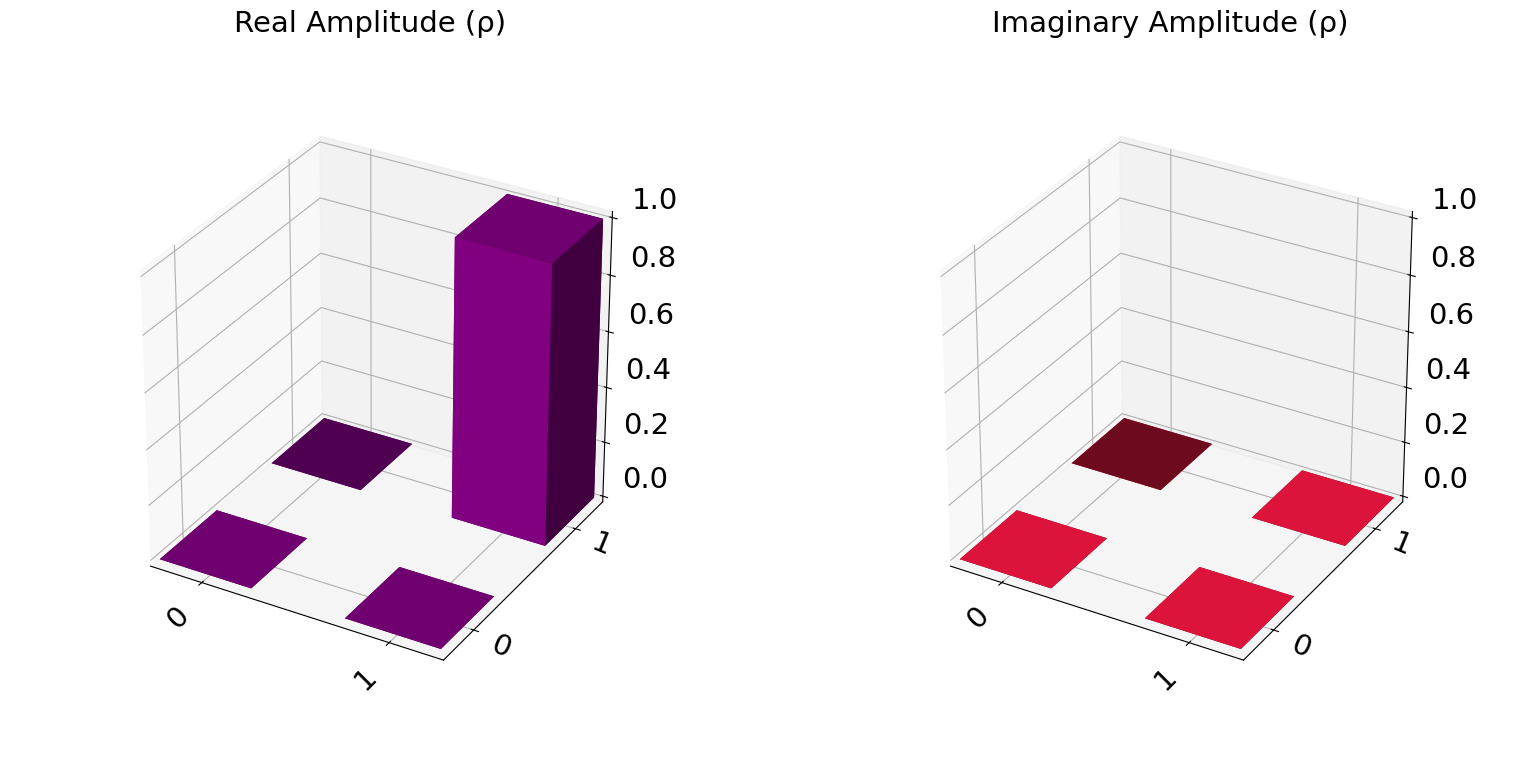

In [ ]:
qc = QuantumCircuit(1)
qc.x(0)
plot_state_city(qc, color = ['purple','crimson'])

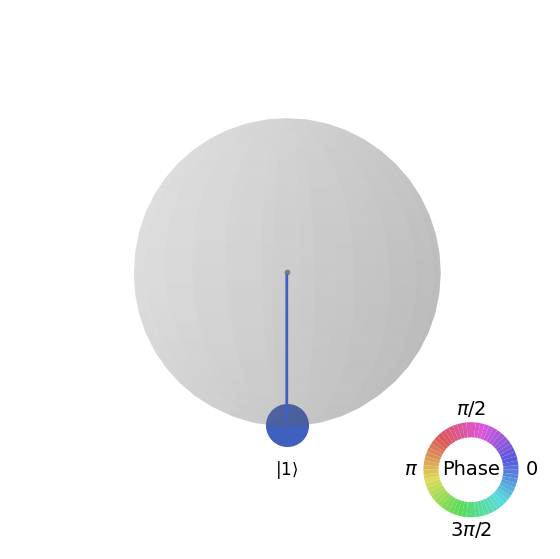

In [ ]:

qc = QuantumCircuit(1)
qc.x(0)
plot_state_qsphere(qc)

#Printing the Unitary Operator for Pauli X

In [ ]:
#simulator = AerSimulator(method = 'unitary')
#qc = transpile(qc, simulator)
#result = simulator.run(qc).result().get_statevector(qc)
#plot_bloch_multivector(result)

qc = QuantumCircuit(1)
qc.x(0) # Here. 0 is the control qubit and 1 is the target qubit
qc.save_unitary()


simulator = AerSimulator(method = 'unitary')
qc = transpile(qc, simulator)

# Run and get unitary
result = simulator.run(qc).result().get_unitary(qc)
print(np.asarray(result).round(5))

[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]


#Histogram for Pauli X gate

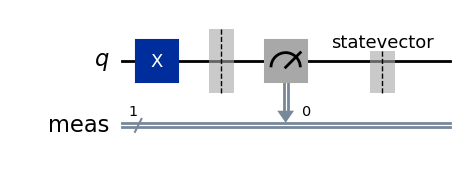

In [ ]:
qc = QuantumCircuit(1)
qc.x(0)
qc.measure_all()
qc.save_statevector()
qc.draw('mpl')

#Running the Pauli X circuit using QASM Simulator

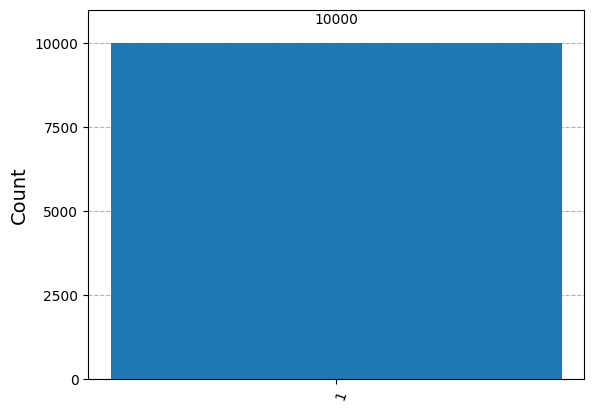

In [ ]:
shots = 10000

sim_automatic = AerSimulator(method='automatic')
job_automatic = sim_automatic.run(qc, shots=shots)
counts_automatic = job_automatic.result().get_counts(qc)

plot_histogram(counts_automatic)

#Pauli Y gate

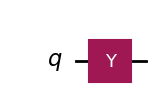

In [ ]:
qc = QuantumCircuit(1) #Quantum Circuit
qc.y(0) # Y Gate on 1st Qubit
qc.draw('mpl')

#Plotting the Bloch Sphere for Pauli Y Gate


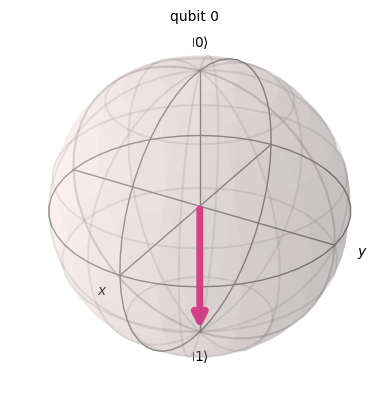

In [ ]:
qc = QuantumCircuit(1)
qc.y(0) # Here. 0 is the control qubit and 1 is the target qubit
qc.save_statevector()


simulator = AerSimulator(method = 'statevector')
qc = transpile(qc, simulator)
result = simulator.run(qc).result().get_statevector(qc)
plot_bloch_multivector(result)

#Printing the Unitary Operator for Pauli Y

In [ ]:
qc = QuantumCircuit(1)
qc.y(0) # Here. 0 is the control qubit and 1 is the target qubit
qc.save_unitary()


simulator = AerSimulator(method = 'unitary')
qc = transpile(qc, simulator)

# Run and get unitary
result = simulator.run(qc).result().get_unitary(qc)
print(np.asarray(result).round(5))

[[0.-0.j 0.-1.j]
 [0.+1.j 0.+0.j]]


#QSphere for Pauli Y gate

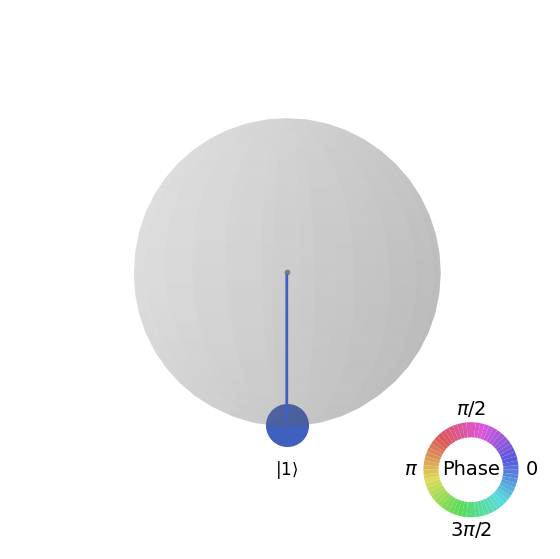

In [ ]:
qc = QuantumCircuit(1)
qc.y(0)
plot_state_qsphere(qc)



#Plotting state city for Pauli Y gate

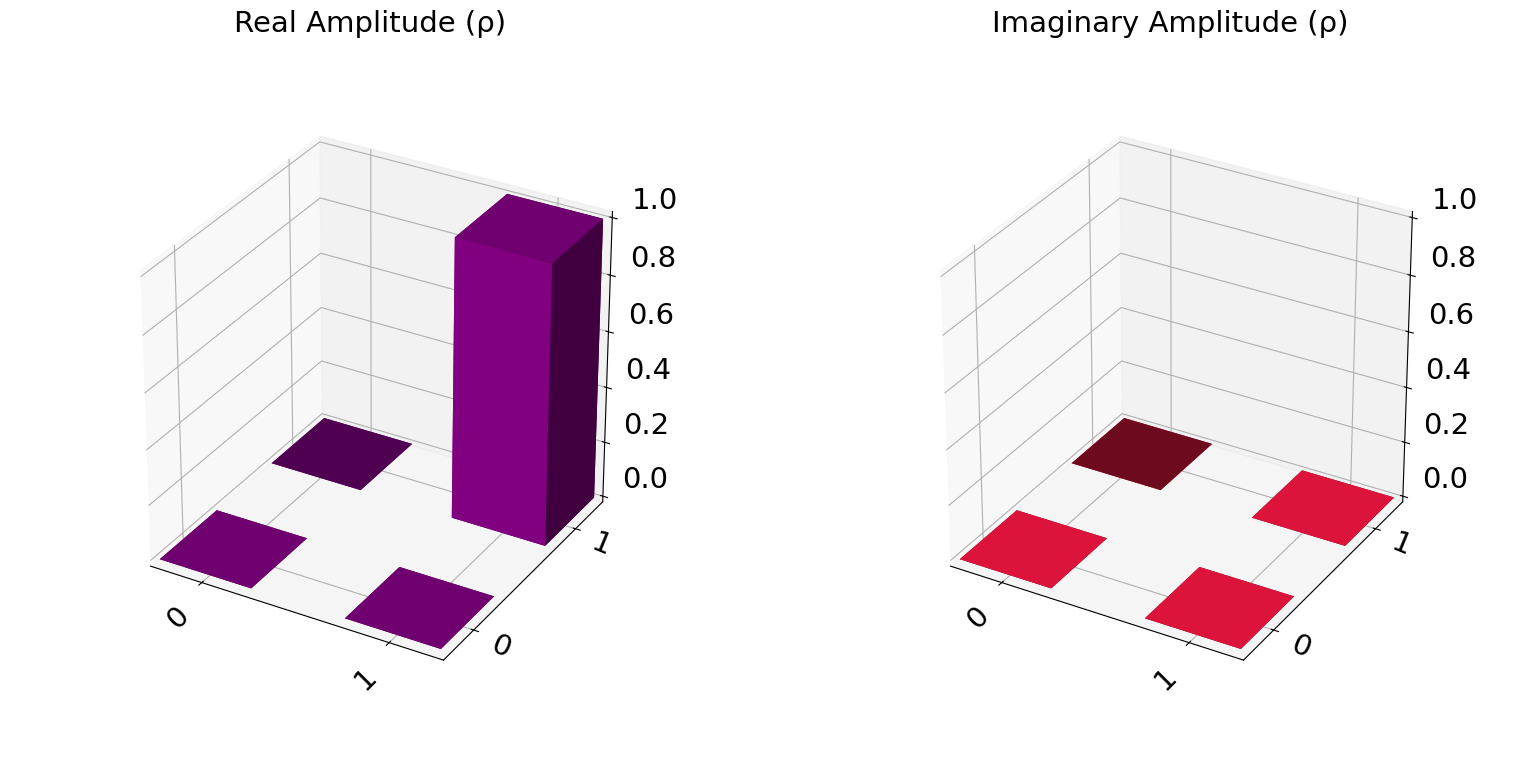

In [ ]:
qc = QuantumCircuit(1)
qc.y(0)
plot_state_city(qc, color = ['purple','crimson'])

#Plotting Histogram for Pauli Y gate

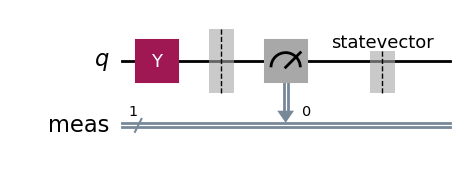

In [ ]:
qc = QuantumCircuit(1) #Quantum Circuit
qc.y(0) # Y Gate on 1st Qubit
qc.measure_all()
qc.save_statevector()
qc.draw('mpl')

#Running the Pauli Y circuit using QASM Simulator


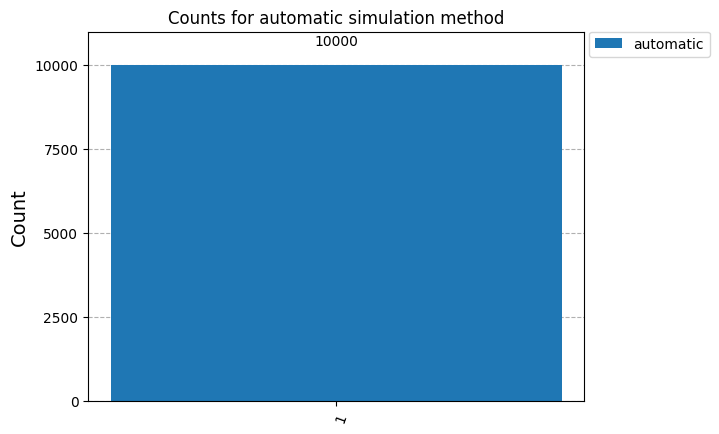

In [ ]:
shots = 10000

sim_automatic = AerSimulator(method='automatic')
job_automatic = sim_automatic.run(qc, shots=shots)
counts_automatic = job_automatic.result().get_counts(0)

plot_histogram([counts_automatic], title='Counts for automatic simulation method',legend=[ 'automatic'])

#Pauli Z gate

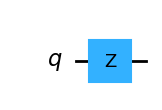

In [ ]:
qc = QuantumCircuit(1)
qc.z(0)
qc.draw('mpl')

#Plotting the Bloch Sphere for Pauli Z Gate

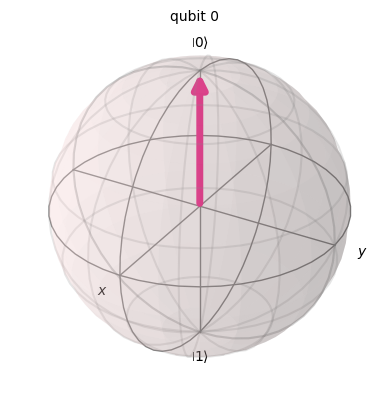

In [ ]:
qc = QuantumCircuit(1)
qc.z(0)
qc.save_statevector()

simulator = AerSimulator(method = 'statevector')
qc = transpile(qc, simulator)
result = simulator.run(qc).result().get_statevector(qc)
plot_bloch_multivector(result)

#Unitary operator for Pauli Z gate

In [ ]:
qc = QuantumCircuit(1)
qc.z(0) # Here. 0 is the control qubit and 1 is the target qubit
qc.save_unitary()


simulator = AerSimulator(method = 'unitary')
qc = transpile(qc, simulator)

# Run and get unitary
result = simulator.run(qc).result().get_unitary(qc)
print(np.asarray(result).round(5))

[[ 1.+0.j  0.+0.j]
 [-0.+0.j -1.+0.j]]


#QSphere for Pauli Z gate

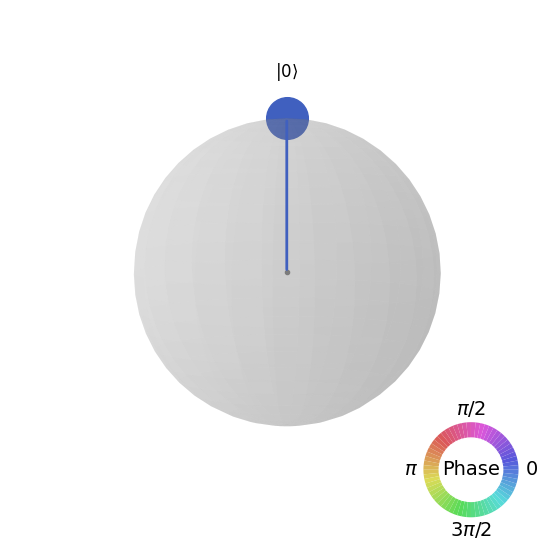

In [ ]:
qc = QuantumCircuit(1)
qc.z(0)
plot_state_qsphere(qc)

#Plotting state city for Pauli Z gate

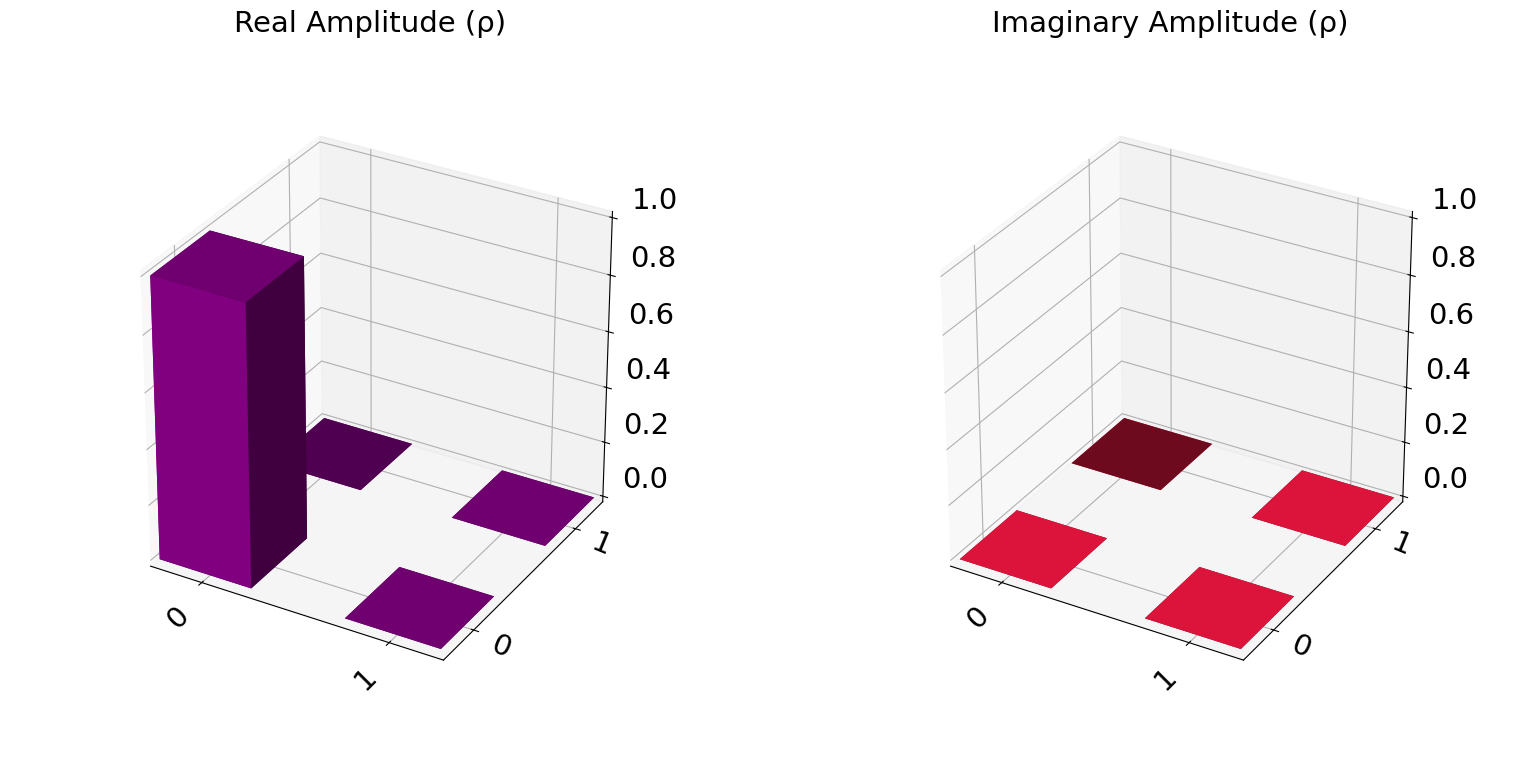

In [ ]:
qc = QuantumCircuit(1)
qc.z(0)
plot_state_city(qc, color = ['purple','crimson'])

#Plotting Histogram for Pauli Z gate

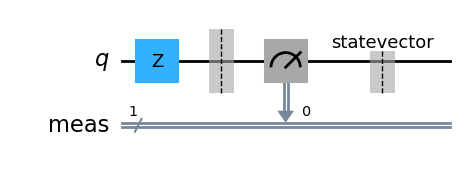

In [ ]:
qc = QuantumCircuit(1)
qc.z(0)
qc.measure_all()
qc.save_statevector()
qc.draw('mpl')

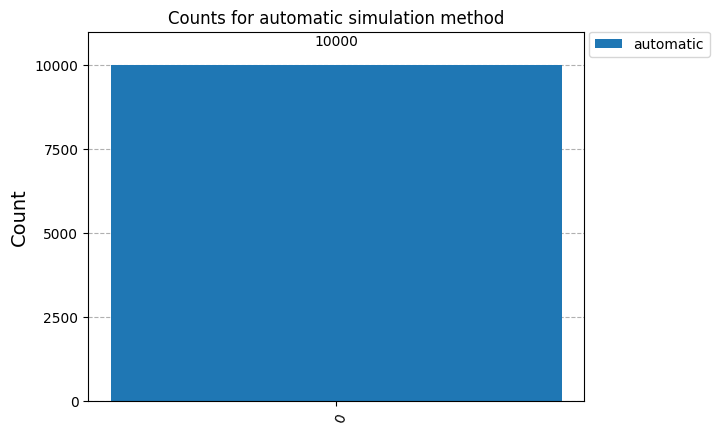

In [ ]:
shots = 10000

sim_automatic = AerSimulator(method='automatic')
job_automatic = sim_automatic.run(qc, shots=shots)
counts_automatic = job_automatic.result().get_counts(0)

plot_histogram([counts_automatic], title='Counts for automatic simulation method',legend=[ 'automatic'])

#Hadamard Gate



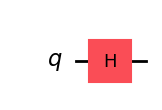

In [ ]:
qc = QuantumCircuit(1)
qc.h(0)
qc.draw('mpl')

#Plotting the Bloch Sphere for Hadamard Gate



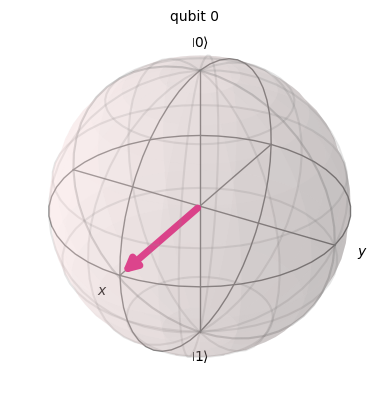

In [ ]:
qc = QuantumCircuit(1)
qc.h(0)
qc.save_statevector()

simulator = AerSimulator(method = 'statevector')
qc = transpile(qc, simulator)
result = simulator.run(qc).result().get_statevector(qc)
plot_bloch_multivector(result)

#Printing the Unitary Operator for Hadamard Gate

In [ ]:
qc = QuantumCircuit(1)
qc.h(0) # Here. 0 is the control qubit and 1 is the target qubit
qc.save_unitary()


simulator = AerSimulator(method = 'unitary')
qc = transpile(qc, simulator)

# Run and get unitary
result = simulator.run(qc).result().get_unitary(qc)
print(np.asarray(result).round(5))

[[ 0.70711+0.j  0.70711-0.j]
 [ 0.70711+0.j -0.70711+0.j]]


#QSphere for Hadamard gate

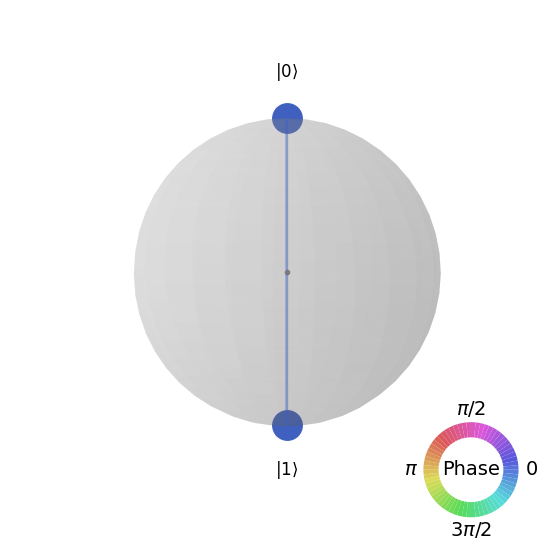

In [ ]:
qc = QuantumCircuit(1)
qc.h(0)
plot_state_qsphere(qc)

#Plotting state city for Hadamard gate

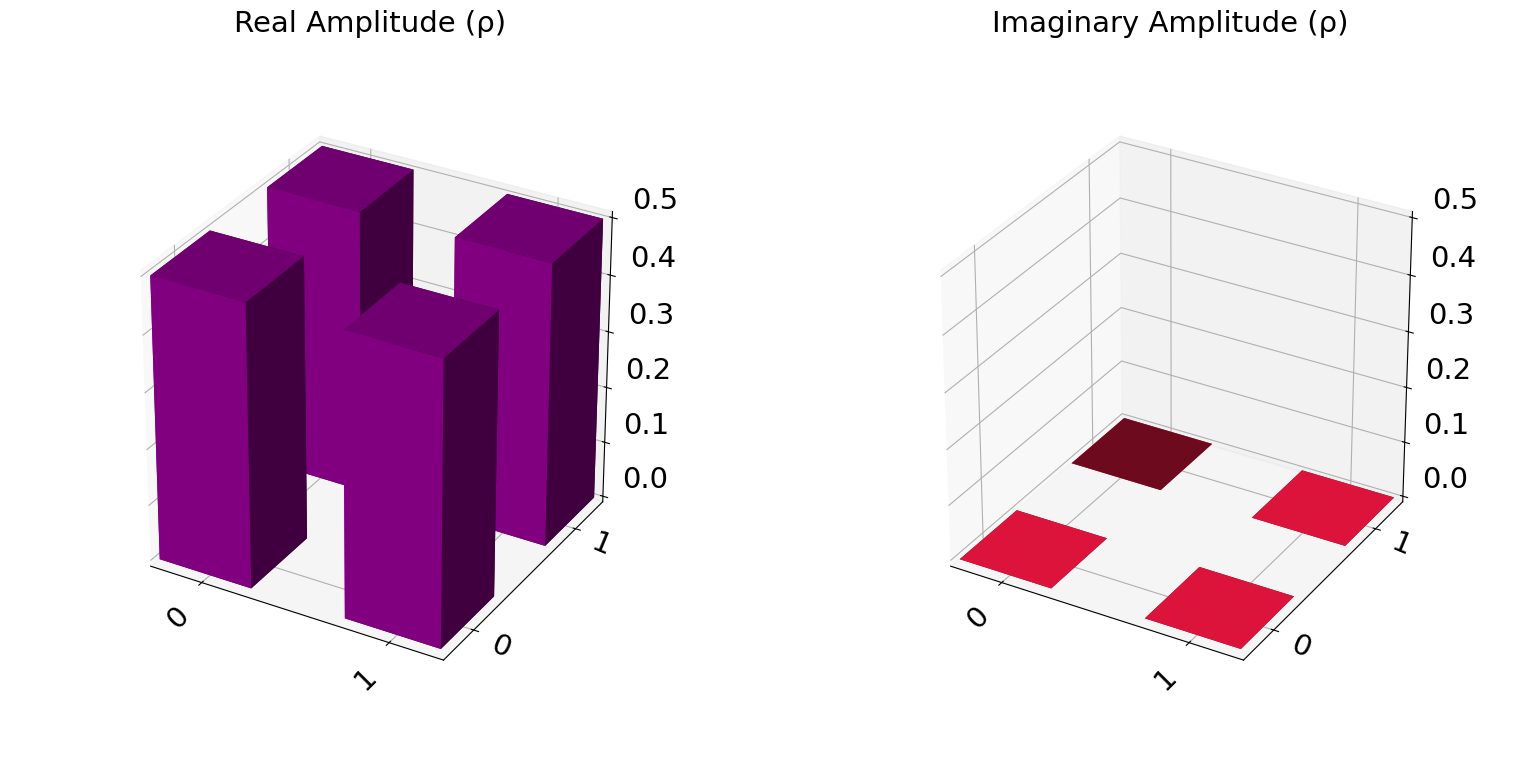

In [ ]:
qc = QuantumCircuit(1)
qc.h(0)
plot_state_city(qc, color = ['purple','crimson'])

#Running the Hadamard Circuit using the QASM Simulator

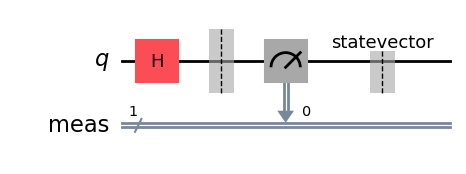

In [ ]:
qc = QuantumCircuit(1)
qc.h(0)
qc.measure_all()
qc.save_statevector()
qc.draw('mpl')

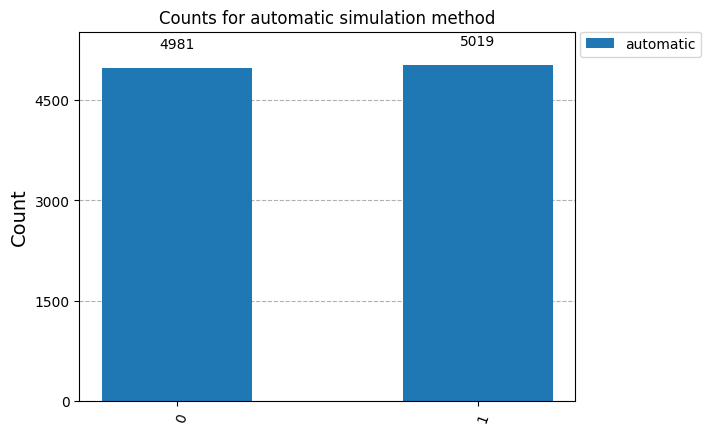

In [ ]:
shots = 10000

sim_automatic = AerSimulator(method='automatic')
job_automatic = sim_automatic.run(qc, shots=shots)
counts_automatic = job_automatic.result().get_counts(0)

plot_histogram([counts_automatic], title='Counts for automatic simulation method',legend=[ 'automatic'])

#S Gate

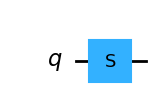

In [ ]:
qc = QuantumCircuit(1)
qc.s(0)
qc.draw('mpl')

The preceding code doesn't have an effect on a qubit. In Bloch Sphere, the qubit state is in  \ket0 . In order to see the transition in the Bloch Sphere one needs to add X gate followed by S gate.

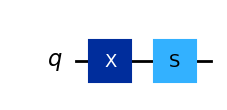

In [ ]:
qc = QuantumCircuit(1)
qc.x(0)
qc.s(0)
qc.draw('mpl')

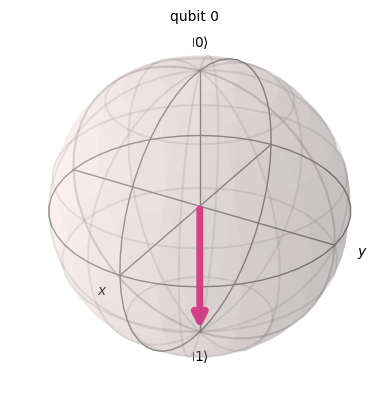

In [ ]:
qc = QuantumCircuit(1)
qc.x(0)
qc.s(0)
qc.save_statevector()

simulator = AerSimulator(method = 'statevector')
qc = transpile(qc, simulator)
result = simulator.run(qc).result().get_statevector(qc)
plot_bloch_multivector(result)

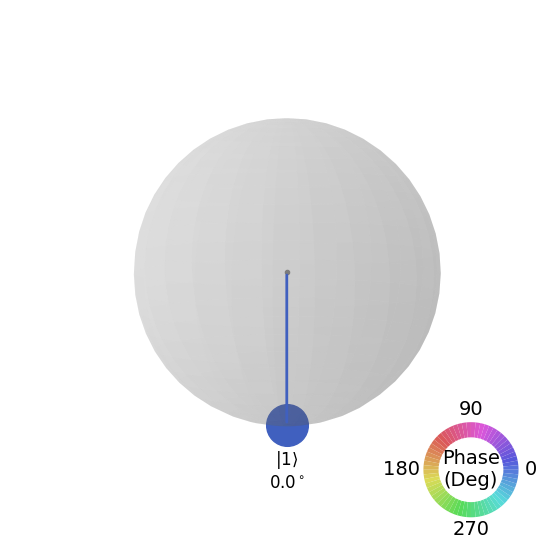

In [ ]:
qc = QuantumCircuit(1)
qc.x(0)
qc.s(0)
plot_state_qsphere(qc,show_state_phases=True, use_degrees=True)

In [ ]:
qc = QuantumCircuit(1)
qc.x(0)
qc.s(0)
qc.save_statevector()


simulator = AerSimulator(method = 'statevector')
qc = transpile(qc, simulator)
result = simulator.run(qc).result().get_statevector(qc)
print(result)

Statevector([-1.12481984e-32-6.123234e-17j,  6.12323400e-17+1.000000e+00j],
            dims=(2,))


There is a difference of statevector which you can observe in the book and here. This variation is due to:

1.Floating-Point Arithmetic: Quantum simulators rely on finite-precision floating-point numbers, leading to small numerical discrepancies.

2.Qiskit Version Differences: Updated versions of Qiskit may optimize quantum operations differently, resulting in minor variations. This collab runs in updated version.

These differences are expected and do not affect the correctness of the quantum state.

#S Dagger Gate

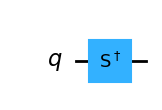

In [ ]:
qc = QuantumCircuit(1)
qc.sdg(0)
qc.draw('mpl')

#Statevector for Sdg gate

In [ ]:
qc = QuantumCircuit(1)
qc.sdg(0)
qc.save_statevector()


simulator = AerSimulator(method = 'statevector')
qc = transpile(qc, simulator)
result = simulator.run(qc).result().get_statevector(qc)
print(result)

Statevector([1.+0.j, 0.-0.j],
            dims=(2,))


#Implementation of S and Sdg gate

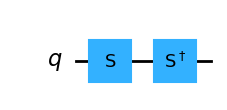

In [ ]:
qc = QuantumCircuit(1)
qc.s(0)
qc.sdg(0)
qc.draw('mpl')

#Statevector for S and S dagger gate


In [ ]:
qc = QuantumCircuit(1)
qc.s(0)
qc.sdg(0)
qc.save_statevector()


simulator = AerSimulator(method = 'statevector')
qc = transpile(qc, simulator)
result = simulator.run(qc).result().get_statevector(qc)
print(result)

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


# T gate


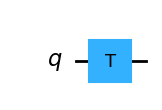

In [ ]:
qc = QuantumCircuit(1)
qc.t(0)
qc.draw('mpl')

# Applying Y gate followed by T gate


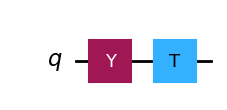

In [ ]:
qc = QuantumCircuit(1)
qc.y(0)
qc.t(0)
qc.draw('mpl')

#Statevector for the above gate


In [ ]:
qc = QuantumCircuit(1)
qc.y(0)
qc.t(0)
qc.save_statevector()


simulator = AerSimulator(method = 'statevector')
qc = transpile(qc, simulator)
result = simulator.run(qc).result().get_statevector(qc)
print(result)


Statevector([-4.32978028e-17-4.32978028e-17j,
             -7.07106781e-01+7.07106781e-01j],
            dims=(2,))


Again you can find the differences in statevectors in book and here. Both are theoretically correct and accurate. The reason for the difference is different Qiskit versions, floating point precision and backend implementation

#T Dagger Gate

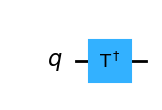

In [ ]:
qc = QuantumCircuit(1)
qc.tdg(0)
qc.draw('mpl')


#Implementation of T dagger gate with other clifford gate

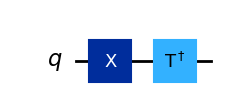

In [ ]:
qc = QuantumCircuit(1)
qc.x(0)
qc.tdg(0)
qc.draw('mpl')

#Statevector for the above gate

In [ ]:
qc = QuantumCircuit(1)
qc.x(0)
qc.tdg(0)
qc.save_statevector()


simulator = AerSimulator(method = 'statevector')
qc = transpile(qc, simulator)
result = simulator.run(qc).result().get_statevector(qc)
print(result)

Statevector([-4.32978028e-17+4.32978028e-17j,
              7.07106781e-01-7.07106781e-01j],
            dims=(2,))


#Implementation of T dagger gate with other gates

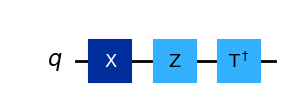

In [ ]:
qc = QuantumCircuit(1)
qc.x(0)
qc.z(0)
qc.tdg(0)
qc.draw('mpl')

#Statevector Implementation of T dagger gate with other gates

In [ ]:
qc = QuantumCircuit(1)
qc.x(0)
qc.z(0)
qc.tdg(0)
qc.save_statevector()


simulator = AerSimulator(method = 'statevector')
qc = transpile(qc, simulator)
result = simulator.run(qc).result().get_statevector(qc)
print(result)

Statevector([ 4.32978028e-17-4.32978028e-17j,
             -7.07106781e-01+7.07106781e-01j],
            dims=(2,))


#Rx gate

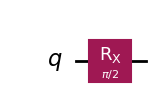

In [ ]:

import math

qc = QuantumCircuit(1)
theta = math.pi / 2
qc.rx(theta, 0)
qc.draw(output='mpl')

#Plotting the Bloch Sphere for Rx Gate

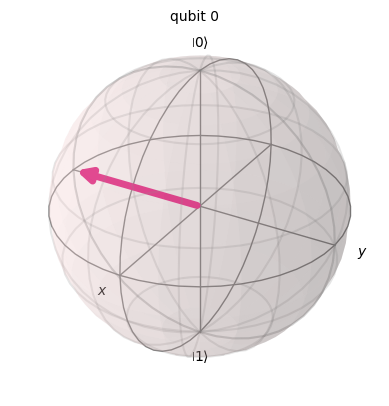

In [ ]:
qc = QuantumCircuit(1)
theta = math.pi / 2
qc.rx(theta, 0)
qc.save_statevector()

simulator = AerSimulator(method = 'statevector')
qc = transpile(qc, simulator)
result = simulator.run(qc).result().get_statevector(qc)
plot_bloch_multivector(result)

#Ry Gate

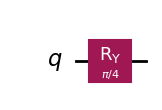

In [ ]:
qc = QuantumCircuit(1)
theta = math.pi / 4
qc.ry(theta, 0)
qc.draw(output='mpl')

#Plotting the Bloch Sphere for Ry Gate

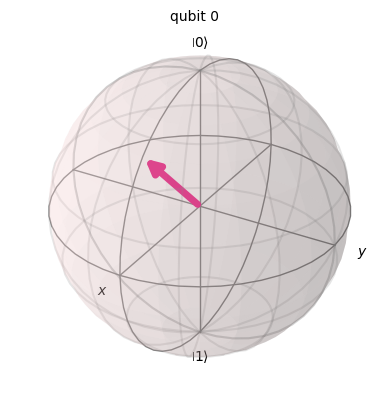

In [ ]:
qc = QuantumCircuit(1)
theta = math.pi/4
qc.ry(theta, 0)
qc.save_statevector()

simulator = AerSimulator(method = 'statevector')
qc = transpile(qc, simulator)
result = simulator.run(qc).result().get_statevector(qc)

plot_bloch_multivector(result)

#Rz Gate

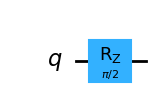

In [ ]:
qc = QuantumCircuit(1)
theta = math.pi/2
qc.rz(theta, 0)
qc.draw(output='mpl')


#Plotting the Bloch Sphere for Rz Gate

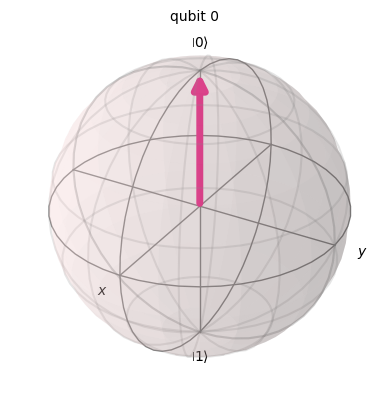

In [ ]:
qc = QuantumCircuit(1)
theta = math.pi/2
qc.rz(theta, 0)
qc.save_statevector()

simulator = AerSimulator(method = 'statevector')
qc = transpile(qc, simulator)
result = simulator.run(qc).result().get_statevector(qc)
plot_bloch_multivector(result)

#Phase gate

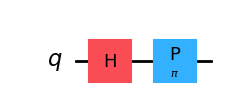

In [ ]:
qc = QuantumCircuit(1)
qc.h(0)
qc.p(np.pi, 0)
qc.draw('mpl')

#Plotting Bloch Sphere for Phase gate

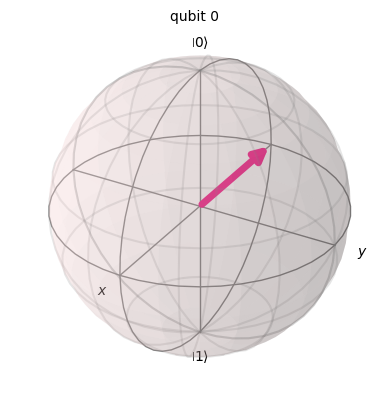

In [ ]:
qc = QuantumCircuit(1)
qc.h(0)
qc.p(np.pi, 0)
qc.save_statevector()

simulator = AerSimulator(method = 'statevector')
qc = transpile(qc, simulator)
result = simulator.run(qc).result().get_statevector(qc)
plot_bloch_multivector(result)